# Unveiling Bias in Album Ratings: An Exploration of Music Features
Sally Lee, Eddy Pan, Vishnu Eskew

## Introduction
In this computational essay, we delve into the pitchfork's music analytics, aiming to understand the relationship between various music features and album ratings, and potentially find a bias according to the music features. Music is a universal language that profoundly influences our emotions, behaviors, and cultural landscapes. Consequently, we wanted to find out what kind of music features yield to higher rating in pitchfork. 

The primary question guiding our investigation is: 

*How do different music features contribute to perceived biases in album ratings?*

By addressing this question, we aim to shed light on the complex interplay between music features and subjective evaluations, ultimately revealing potential biases that may exist within the rating process.

Understanding these biases is crucial for several reasons. Firstly, it allows us to critically examine the validity and reliability of album ratings as indicators of musical quality. By identifying and quantifying the influence of specific music features on ratings, we can discern whether certain attributes are disproportionately favored or penalized, thereby uncovering potential sources of bias.


### What is Pitchfork?
[Pitchfork](https://pitchfork.com/) is an online music publication site originally founded in 1996. The site has many features, but the main attraction is the album reviews. The first album review by pitchfork was uploaded on January 5, 1999. Since then, more than 25,000 albums have been reviewed on the website. Every single one of these albums is given a rating on a scale of 0.0 to 10.0, and these ratings have sparked plenty of controversy in the past. A score of 0 indicates an album that innovates on how terrible music can be, and a score of 10.0 indicates an instant classic.

Many people love to hate on pitchfork and their methodology for rating albums. An example comes in the review of [Peppa's Adventures: The Album - Peppa Pig](https://pitchfork.com/reviews/albums/peppa-pig-peppas-adventures-the-album/) with a rating of 6.5. Classic albums such as [Discovery - Daft Punk](https://pitchfork.com/reviews/albums/2134-discovery/), [The New Abnormal - The Strokes](https://pitchfork.com/reviews/albums/the-strokes-the-new-abnormal/), and [Rodeo - Travis Scott](https://pitchfork.com/reviews/albums/21016-rodeo/) have all been beaten out by the second LP from the UK singer-songwriter and four year old pig, Peppa.

### Why do we care about Pitchfork?
As self proclaimed music connoiseurs ourselves, we think that our oppinions on music are the objective truth. Despite this, Pitchfork again and again has given some of our favorite albums low scores, in part invalidating the emotional connection we feel with the music we love. In our project, we aim to find out if Pitchfork album reviews are biased, and if so, what formula should an album follow to recieve a high rating on Pitchfork? For example, do albums with higher average BPMs tend to receive higher ratings?

## Methodology

### Data Collection

We collect a comprehensive dataset encompassing album information, including music features from spotify using the spotify API and corresponding ratings from pitchfork web scraping.

For the pitchfork data, we scraped all the pitchfork rating data for each 9 genre categorized in pitchfork. We converted all the scraped data in to a csv format and saved it in a csv file per genre. 

For the spotify data, using album name and artist name, we got the album ID in spotify using the spotipy library. For each album ID, we retrieved all the tracks in the corresponding album. For each track, we got all the features(danceability, energy, key, loudness, mode, acousticness, instrumentalness, liveness, valence, tempo, duration time, time_signature) and created a dataframe that stored all the features of the track along with the track id, first artist, all artists. 

### Data Analysis & Processing

Because all the pitchfork rating was rated per album and not tracks, we calculated a representative feature score for each of the albums. In order to calculate the representative feature score, we used the duration time to calculate a weighted mean. So, for each features in each tracks, we averaged the feature score according to how long the track is. Below is the equation we used to calculate the weighted mean for the track feature score. 

weighted mean = sum(track feature score * duration)/total duration

From the calculated weighted mean for each album, we made a datraframe that contains all the weighted mean for each genre. The 10 unique [features](https://developer.spotify.com/documentation/web-api/reference/get-audio-features) we looked at are as follows:
1. Danceability: How suitable a track is for dancing, on a scale of 0.0 to 1.0.
2. Energy: A measure of intensity and activity of a track, on a scale of 0.0 to 1.0.
3. Key: The key a track is in starting with C = 0, C♯/D♭ = 1, etc, with no key being detected returning a value of -1.
4. Loudness: Overall loudness of a track, generally ranging from -60 decibels to 0 decibels
5. Mode: The modality of a track, major is 1 and minor is 0.
6. Acousticness: A measure of how acoustic a track is, on a scale of 0.0 to 1.0.
7. Instrumentalness: A measure of how much vocal content is in a track, with a true instrumental having a value of 1.0.
8. Liveness: A measure of whether or not an audience was present when the track was recorded, on a scale of 0.0 to 1.0.
9. Valence: A measure of how happy/positive a track is, on a scale of 0.0 to 1.0.
10. Tempo: The estimated BPM of a track.

## Bias Identification

Using the processed data, we plotted the feature versus the pitchfork rating for each album.


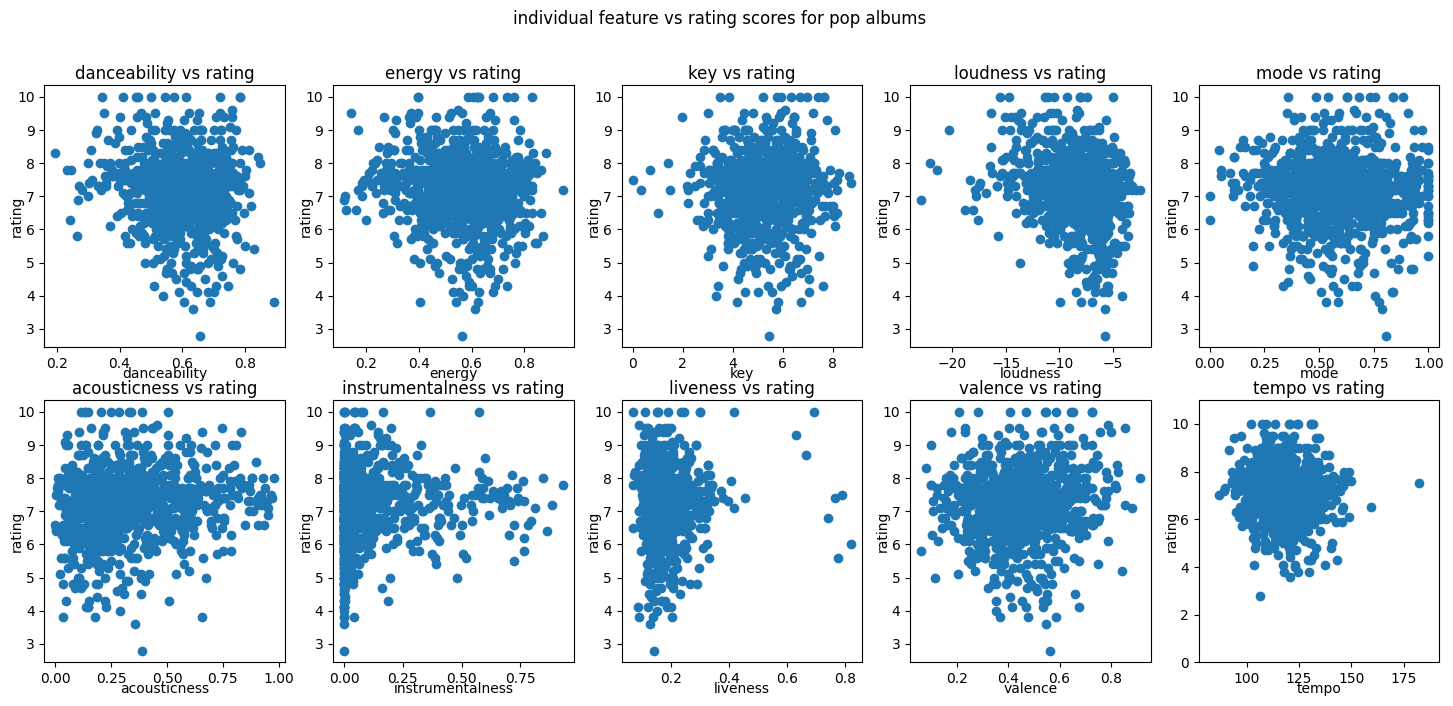

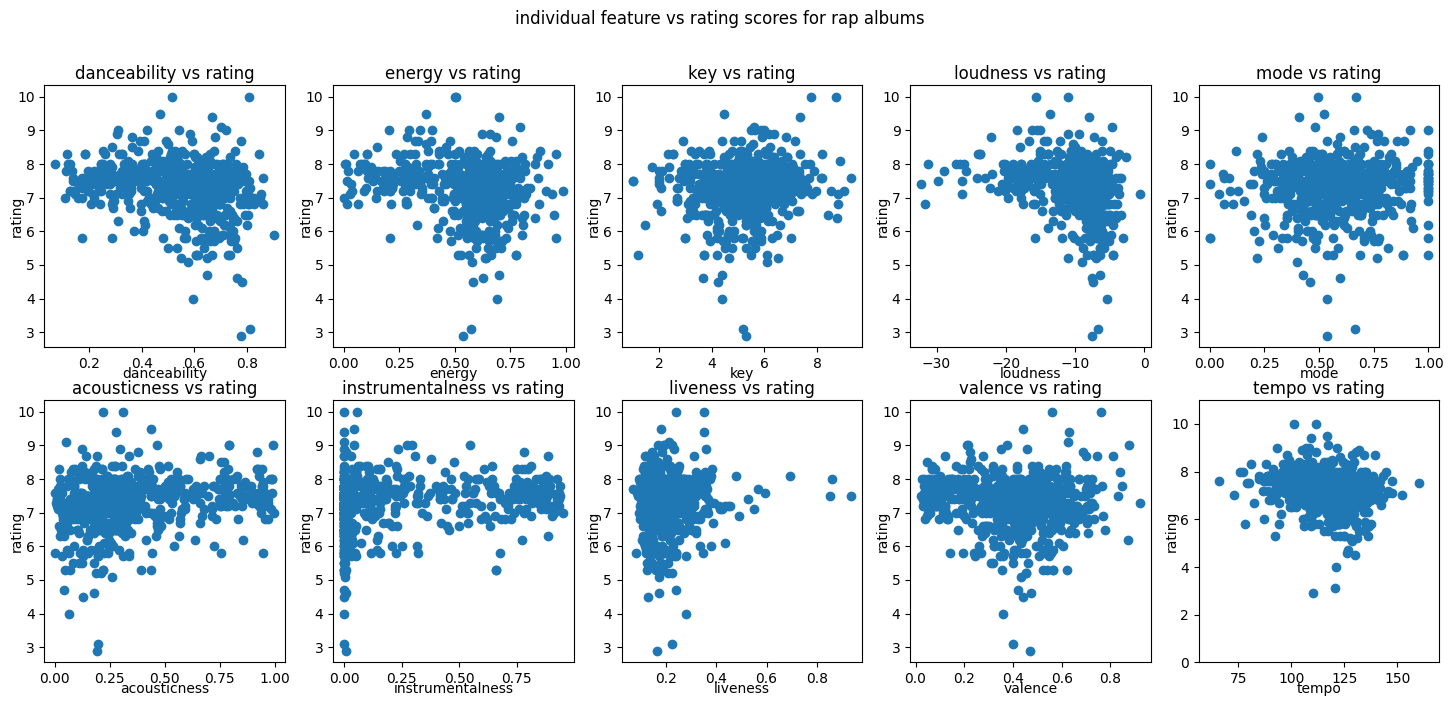

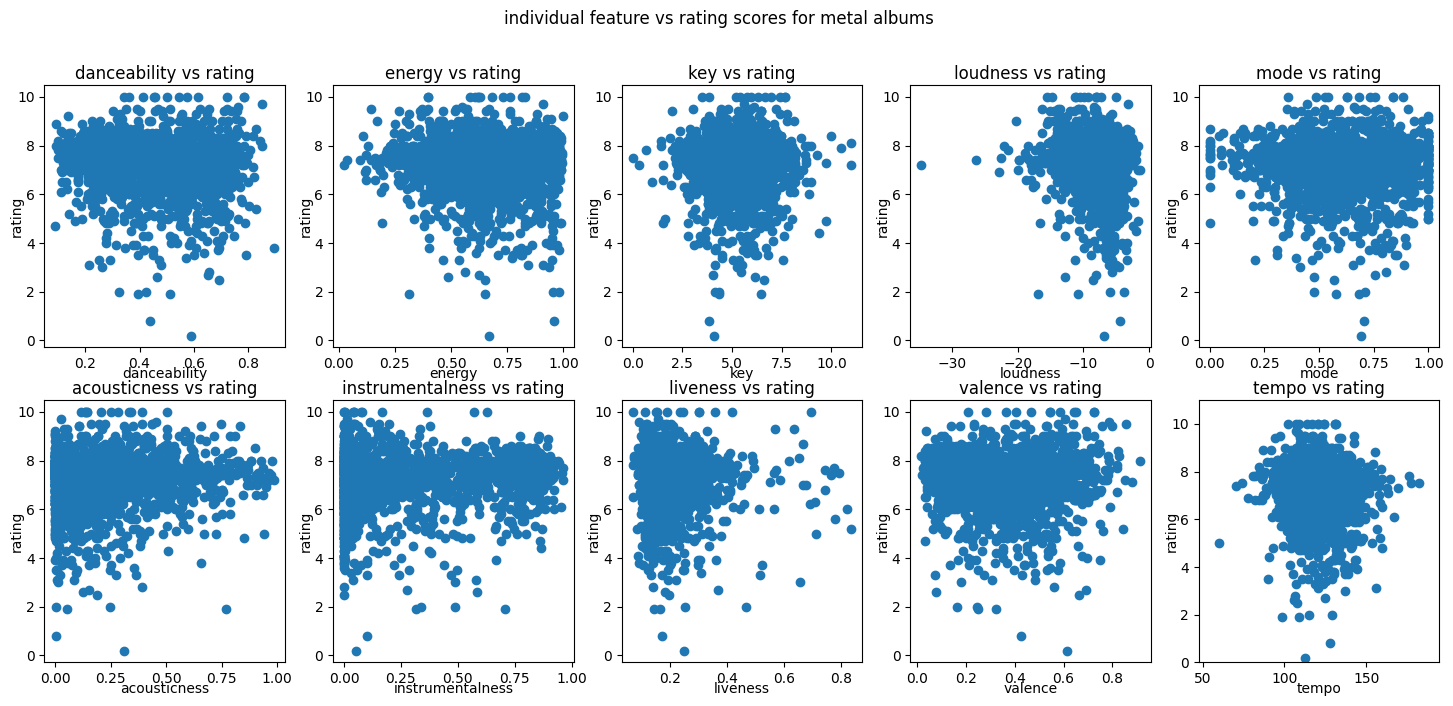

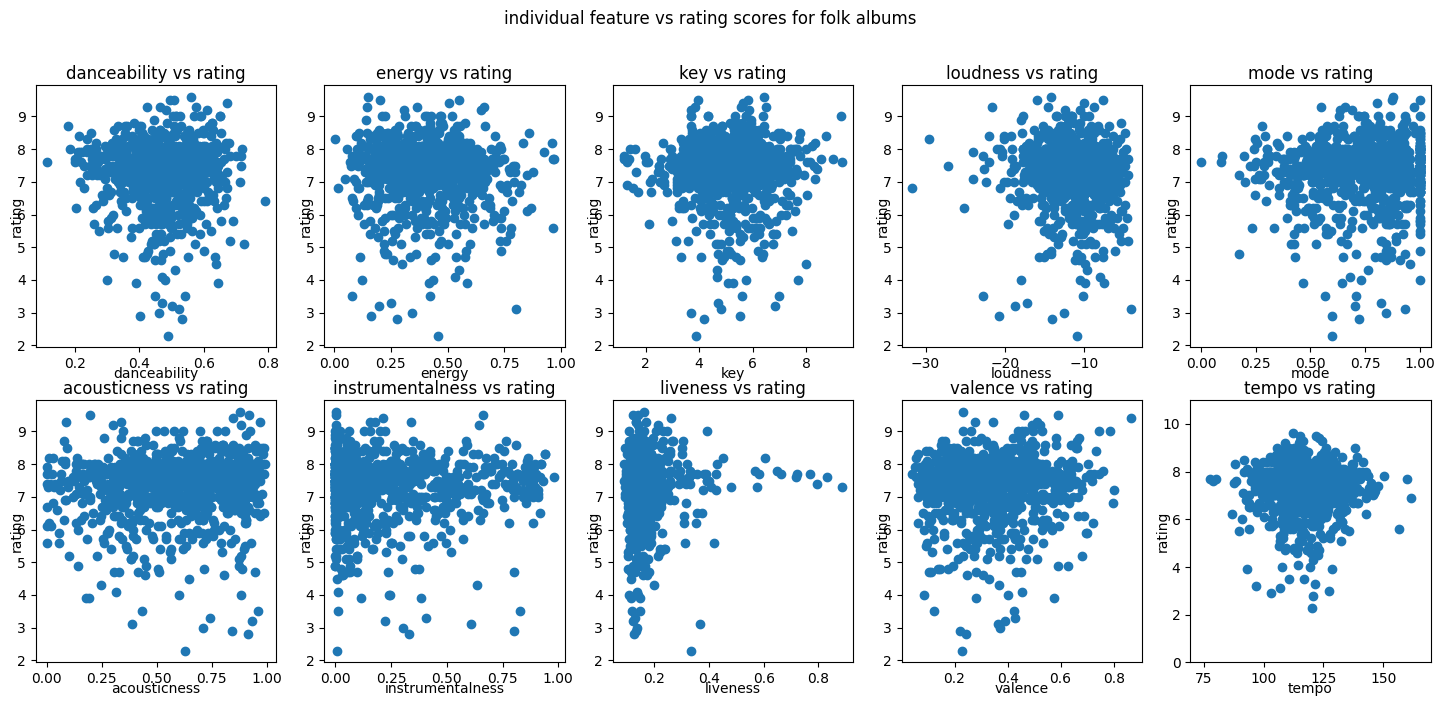

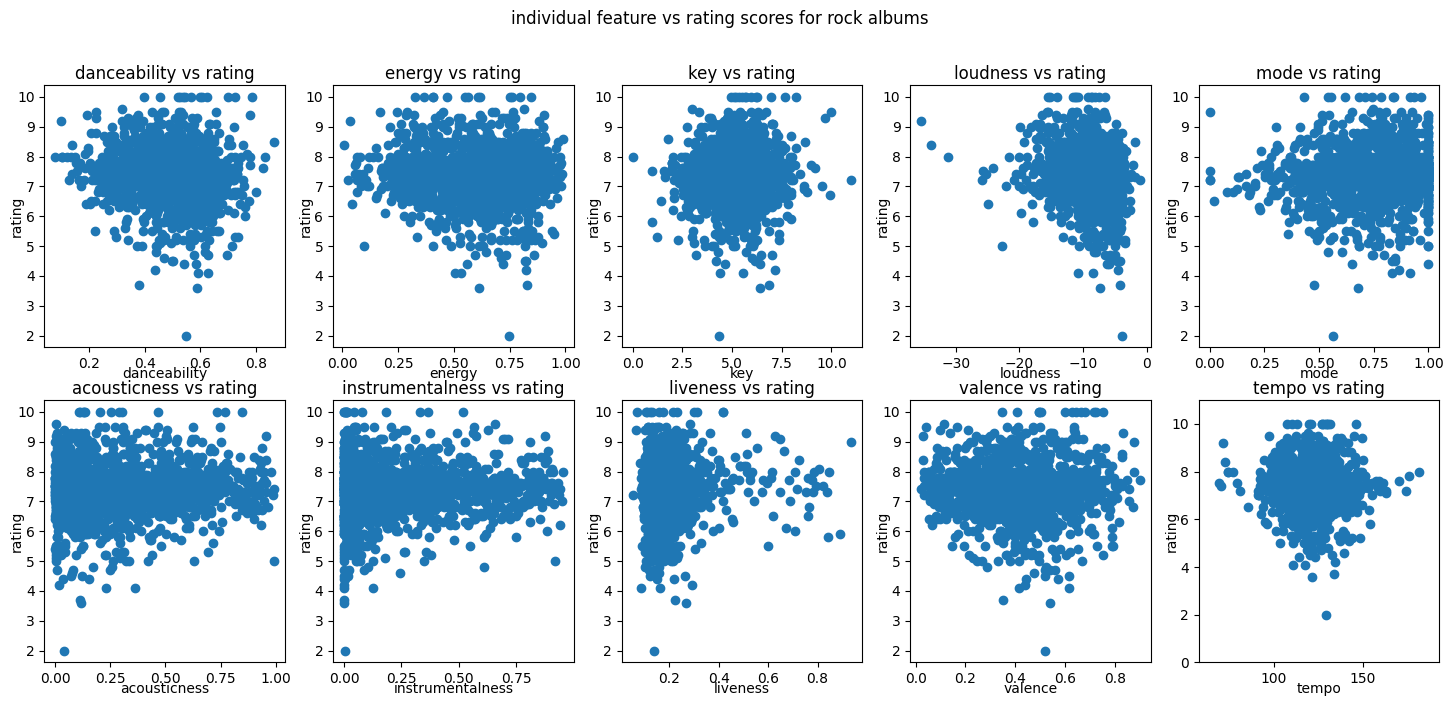

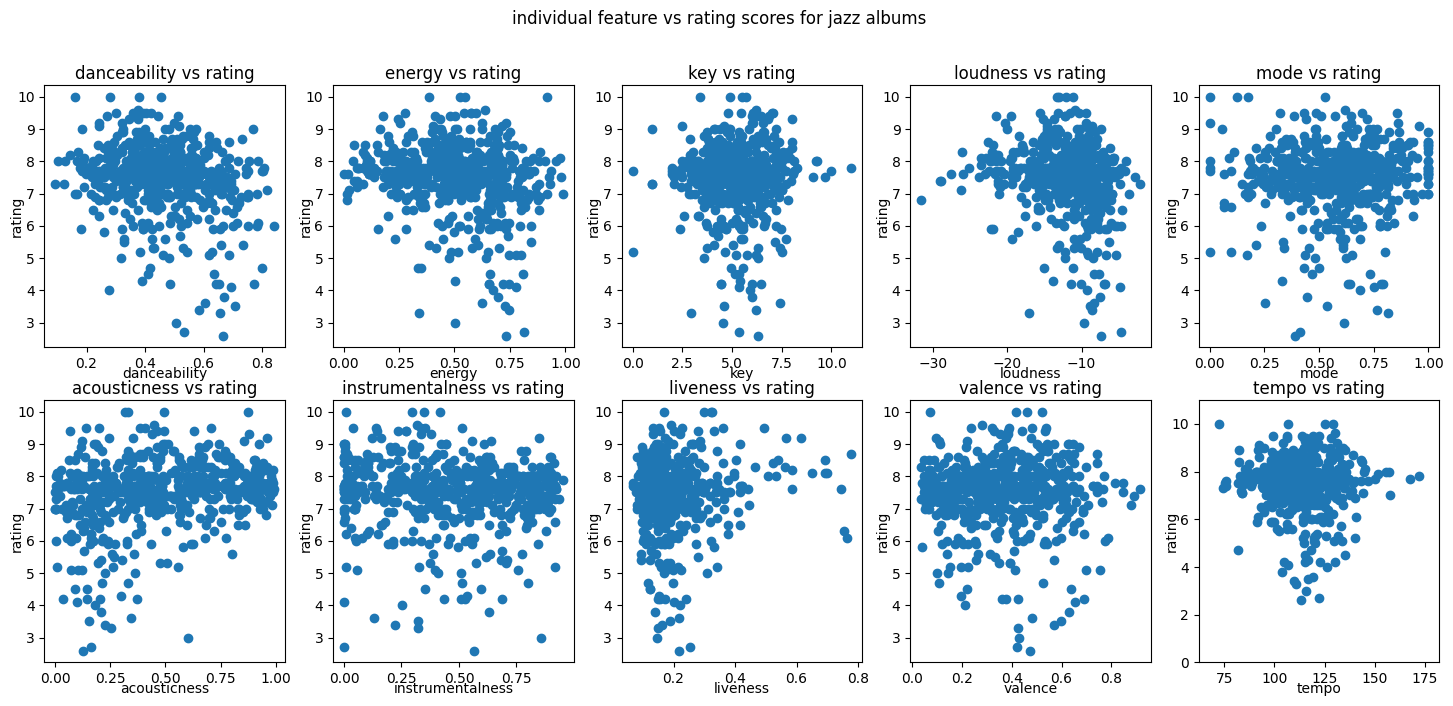

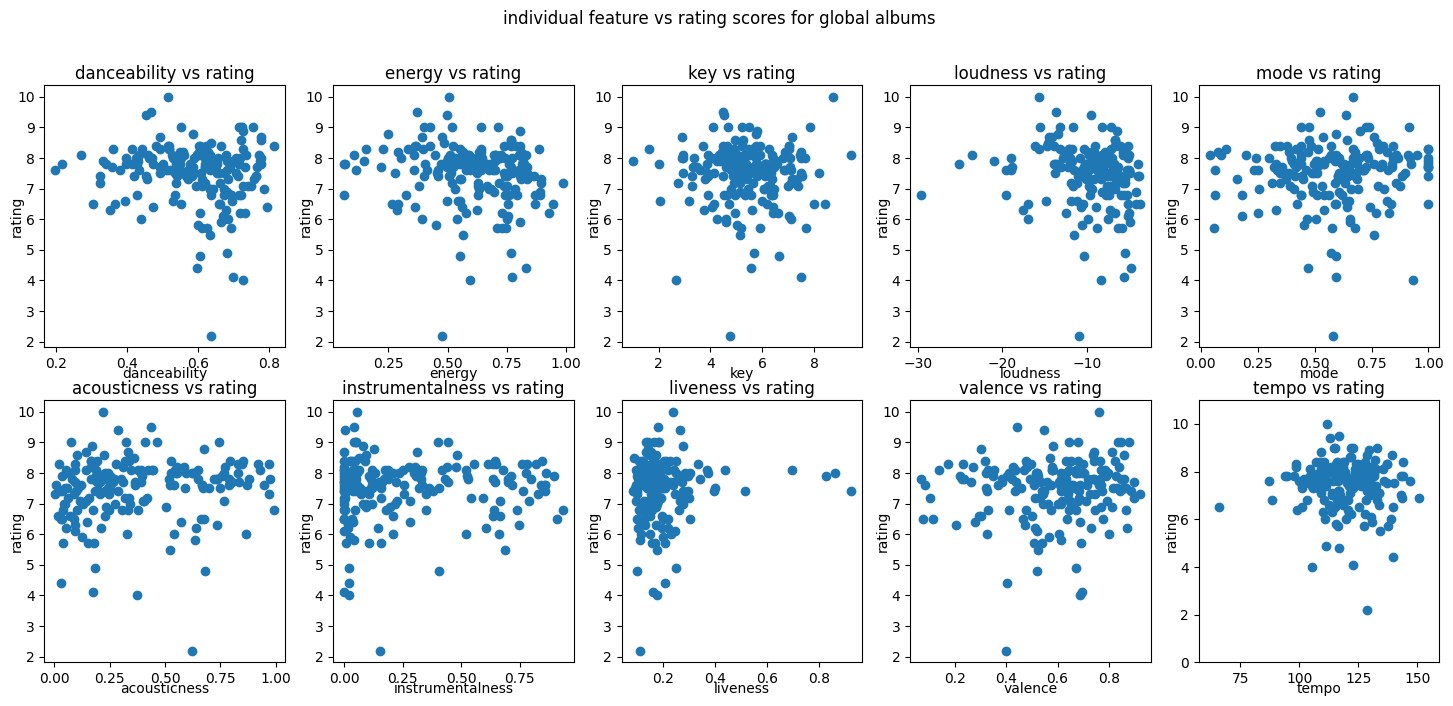

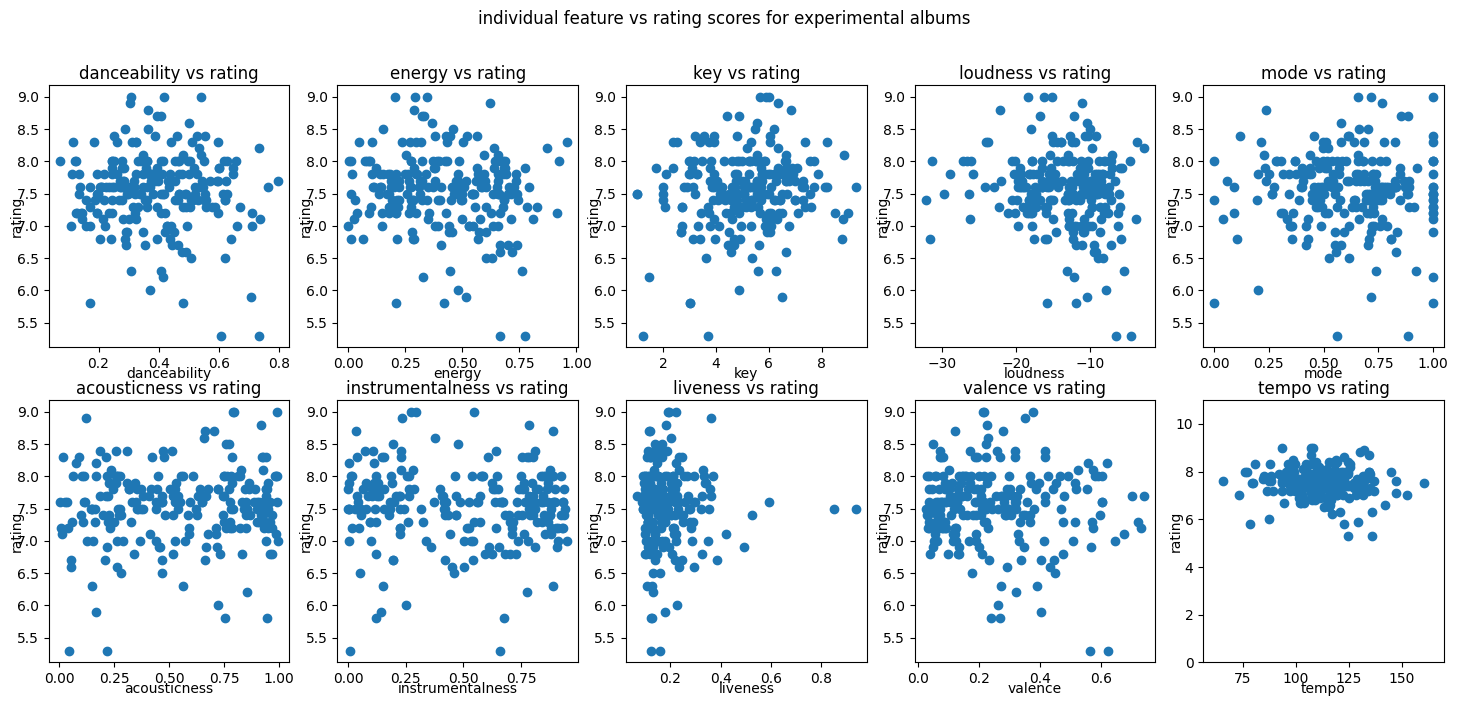

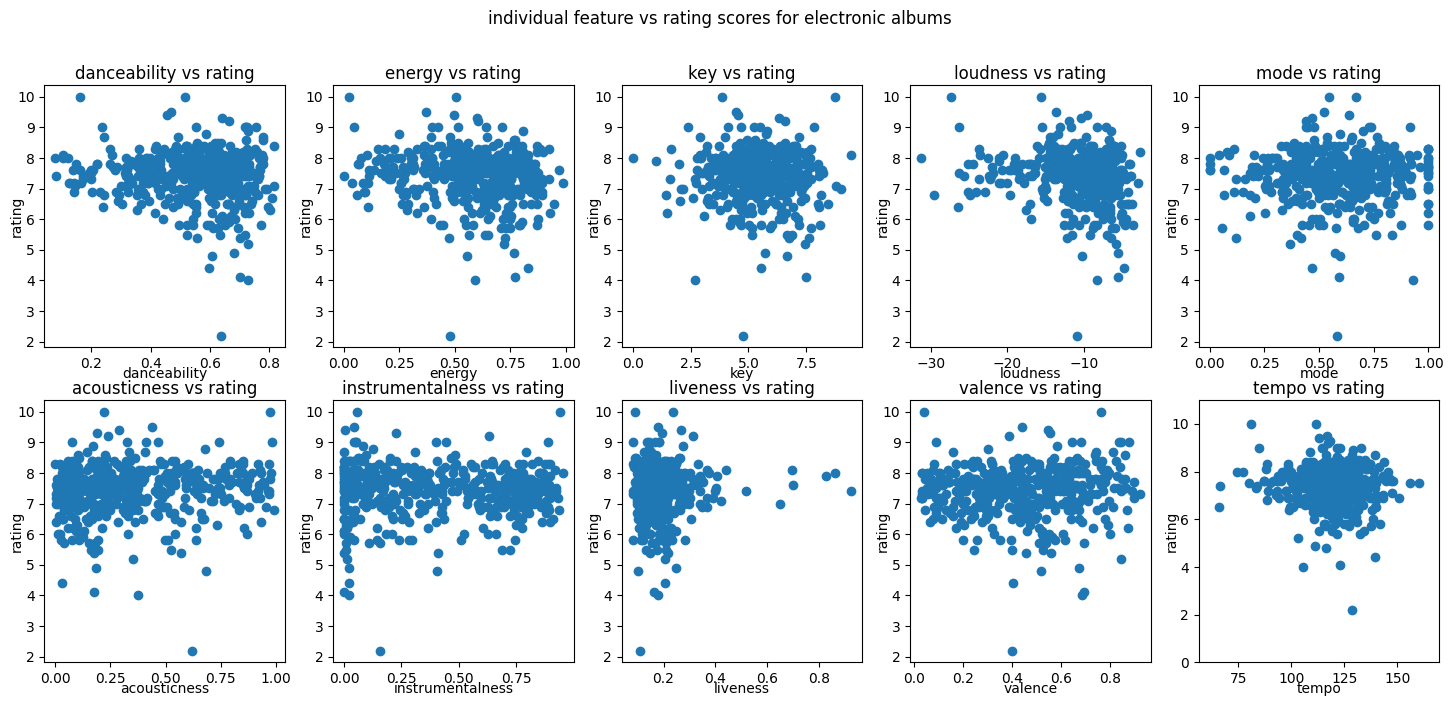

In [12]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# The folder our data we are visualizing comes from.
FOLDER_PATH = 'spotify_and_pitchfork_data/'
# The list of features we are looking at for each album.
FEATURES = [
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo"
]

# Loops through each file in the folder "data_final/"
for file_path in glob.glob(FOLDER_PATH + "*.csv"):
    # Removes unneccessary elements of the string that don't contain information
    # about the genre.
    genre = file_path[27:-10]
    # Create dataframe from one of the csv files of a genre of Pitchfork albums.
    df = pd.read_csv(file_path)
    # Creates ten subplots that will be used to visualize graphs of ratings vs
    # features for each of the genres.
    _, axs = plt.subplots(2, 5, figsize = (18,7.5))
    # Title each of the subplots.
    plt.suptitle(f"individual feature vs rating scores for {genre} albums")
    # The row the scatterplot will be graphed on.
    row = 0
    # The column the scatterplot will be graphed on.
    column = 0
    # Loops through each feature of an album.
    for _, feature in enumerate(FEATURES):
        # Create a scatterplot where each dot represents an album and the
        # corresponding feature of that album.
        axs[row][column].scatter(df[feature], df["rating"])
        # xmin represents the lowest score an album received for a feature
        # based upon the spotify API.
        xmin = min(df[feature])
        # xmax represents the highest score an album received for a feature
        # based upon the spotify API.
        xmax = max(df[feature])
        # Include some extra space on the sides of the graph so our scatterplot
        # looks cleaner.
        margins = (xmax - xmin) / 10
        # Use previously declared variables to set x axis limits of scatterplot.
        plt.xlim((xmin - margins), (xmax + margins))
        # y axis represents ratings and ratings can only be between 1 and 10.
        plt.ylim(0,11)
        # Set titles of each graph and move down slightly to avoid overlapping
        # with x axis labels.
        axs[row][column].set_title(f"{feature} vs rating", y = .99)
        # Set x axis label and move up slightly to avoid overlapping with graph
        # titles.
        axs[row][column].set_xlabel(f"{feature}", labelpad = -3)
        # Set y axis labels.
        axs[row][column].set_ylabel("rating", labelpad = -5)
        # Move onto the next column once finished.
        column += 1
        # Check if the end of the row has been reached.
        if column > 4:
            # If end of the row is reached, reset to beginning of next row.
            column = 0
            row += 1

/var/folders/7p/56509rkj7kvbtmfr9nmjhvy00000gn/T/ipykernel_51813/1988804256.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, ax=axes[row, col], palette="coolwarm")
/var/folders/7p/56509rkj7kvbtmfr9nmjhvy00000gn/T/ipykernel_51813/1988804256.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
/var/folders/7p/56509rkj7kvbtmfr9nmjhvy00000gn/T/ipykernel_51813/1988804256.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=corre

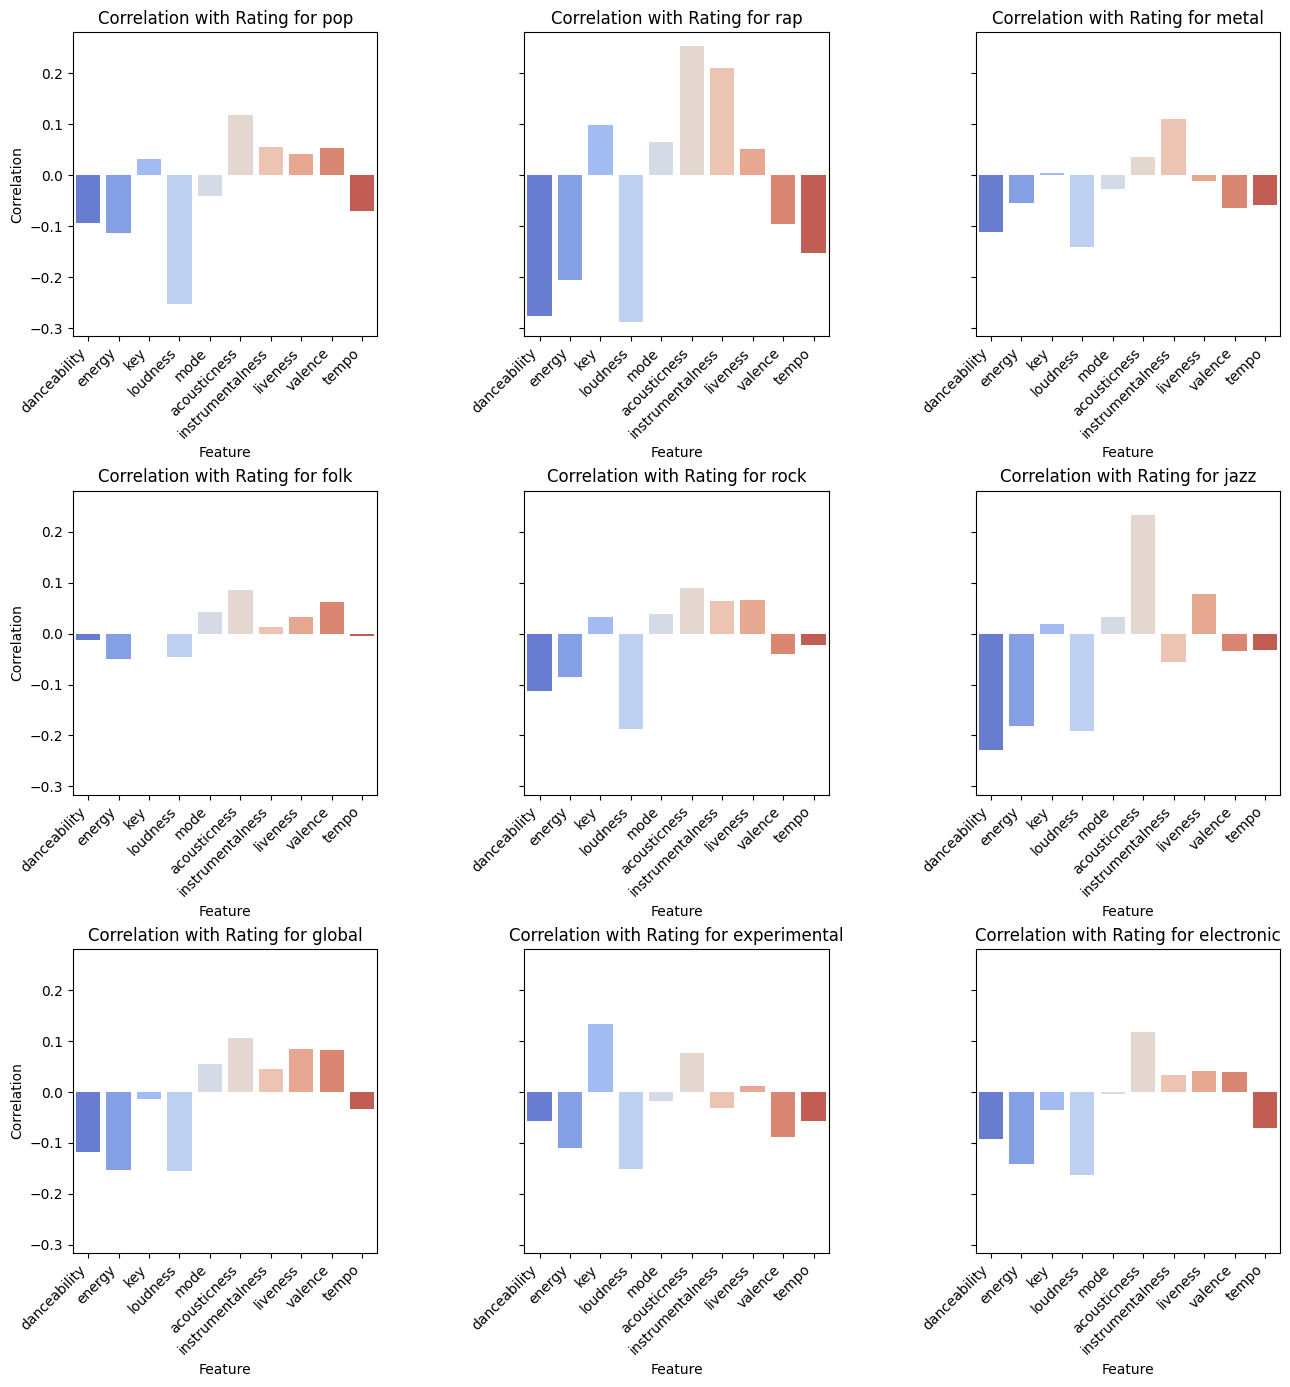

In [28]:
import seaborn as sns


# Get list of CSV files
csv_files = glob.glob(FOLDER_PATH + "*.csv")

# Calculate number of rows and columns for subplots
num_plots = len(csv_files)
num_cols = 3  # Set number of columns for subplots
num_rows = -(-num_plots // num_cols)  # Ceiling division to calculate number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows), sharex = 'row', sharey=True)
fig.tight_layout(pad = 9)  # Adjust padding between subplots

# Iterate over each CSV file
for i, file_path in enumerate(csv_files):
    genre = file_path[27:-10]  # Extract genre from file path
    df = pd.read_csv(file_path)
    
    # Calculate correlation between features and rating
    correlations = df[FEATURES + ["rating"]].corr()["rating"].drop("rating")

    # Determine subplot position
    row = i // num_cols
    col = i % num_cols
    
    # Create bar plot for current genre
    sns.barplot(x=correlations.index, y=correlations.values, ax=axes[row, col], palette="coolwarm")
    axes[row, col].set_title(f"Correlation with Rating for {genre}")
    axes[row, col].set_xlabel("Feature")
    axes[row, col].set_ylabel("Correlation")
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

# Hide empty subplots
for i in range(len(csv_files), num_rows*num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.show()

In the results, you should show the main summaries or visualizations of your data, along with any accompanying information. In doing so, you should answer the following questions:

    What summaries or visualizations did you create?
    What are the interesting and/or important parts of these summaries or visualizations?
    How do these results answer your questions or tell your story?
*How do different music features contribute to perceived biases in album ratings?*

### Does our data answer our question?
After making 90 scatterplots of album features vs. ratings, we were not able to spot any obvious trends in what Pitchfork biases towards when reviewing albums. This result, while somewhat disheartening, does help to answer our primary question, *How do different music features contribute to perceived biases in album ratings?*. The absence of any observable trend of certain features yielding higher Pitchfork ratings is a trend in and of itself. When Pitchfork releases a review, the qualities of an album that earn high ratings are far more nuanced than basic features like danceability or energy. We did also notice that for every genre apart from metal, a high liveness score almost always yielded ratings above 5. For rap, electronic, global, and folk albums, a liveness score above .5 was almost always correlated to a pitchfork rating between 7.0 and 8.0.

##  Conclusion

### Ethical Consideration for Data Sourcing 
Maintaining transparency throughout the data sourcing process is critical. This includes documenting the sources of the data, any data processing or manipulation procedures, and the criteria used for inclusion or exclusion of data points. Additionally, being accountable for the ethical conduct of the project and adhering to relevant ethical guidelines and regulations is essential.

### Contextual Ethical Implications 
The contextual or ethical implications of this topic or work are significant and extend beyond the scope of the project itself. By uncovering biases in album ratings and examining their implications, this research contributes to broader discussions surrounding fairness, diversity, and inclusivity in the music industry. Addressing biases in music evaluation has the potential to promote equitable representation of artists from diverse backgrounds, challenge dominant cultural narratives, and foster a more inclusive and accessible musical landscape for all listeners. 

### Lesson Learned
This project has showed us that when music reviewers review albums, they devise rating systems that do more than just bias towards albums they can bop their head along  or dance to. 

### Challenges
It was hard to source the vast amount of data both from spotify, given its API Request limits. To resolve the problem, we fixed multiple parts of our code. First, we made sure that all the track features in an album can be retrieved in a batch with just one API call. Second, we added `time.sleep()` statements to have less requests in the 30 seconds limit. Third, we added try error statements to check Spotify's exception errors and added timestamps to give according wait time. Last but not least, we exported the csv file after 300 albums, so if the error accours during execution, it would export whatever it had before the error. 

### Future Improvements
If we had more time to work on this project, we would use more statistics for describing albums, as opposed to just taking a weighted mean. Additionally, we would love to look at other music reviewing websites, and seeing if we can find any biases in their method of reviewing albums. The most challenging aspect of our project came when we scraped Spotify.
